In [1]:
# imports boston dataset
from sklearn.datasets import load_boston

# Summary

## Explaratory Data Analysis

### Lows
 - Crime rate
 - Non retail store
 - Nitric oxide
 - Distance between employment centers
 
### Highs
 - Older houses
 - Proportion of blacks by town
 
### Approximation
 - 6-7 Rooms
 - 200-400 Tax
 - 15 > 20 Pupil-Teacher ratio
 - 5 > 20 Lower status of the population
 - 10 > 35 Based on Pricing
 
 
<b>MAE Linear Regression:</b> 3.905144802627508<br>
<b>MAE Lasso Regression:</b> 3.889270839835484<br>
<b>MAE Random Forest Regression:</b> 2.8251286261631092<br>
<b>MAE of the MEAN between Lasso Regression & Random Forest Regression:</b> 3.0672341532940757

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Overview
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. \`Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

**The dataset contains a total of 506 cases.**
There are 14 attributes in each case of the dataset. 
They are:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's USD

In [3]:
# loads boston dataset
boston = load_boston()

In [4]:
# sets into a dataframe
bostondf = pd.DataFrame(boston.data)
bostondf.columns = boston.feature_names

In [5]:
# shows the first five rows
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# shows the basic information of each attribute
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
# creates the PRICE attribute from the and imports 
bostondf['PRICE'] = boston.target

we use describe to check and look at the summary of the dataset, from here we can already tell that there are outliers based on the ratio of mean and max

In [8]:
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


based on these plots, shows the total count and trends between houses.

Graph for CRIM: total = 504


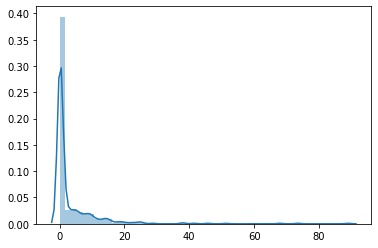

Graph for ZN: total = 26


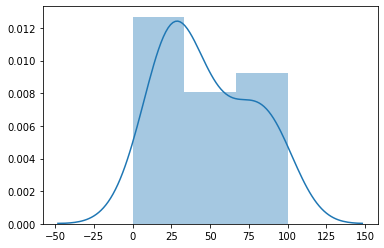

Graph for INDUS: total = 76


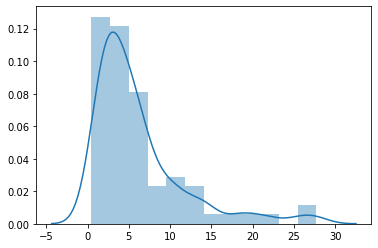

Graph for NOX: total = 81


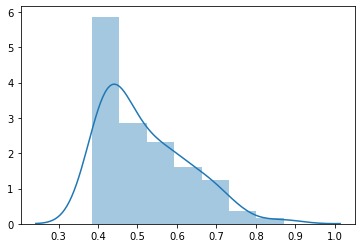

Graph for RM: total = 446


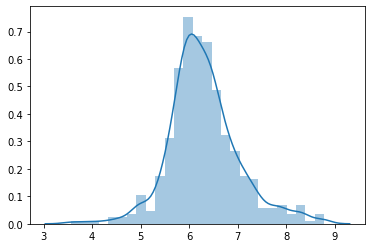

Graph for AGE: total = 356


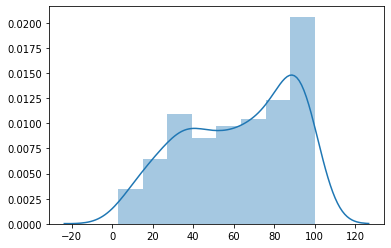

Graph for DIS: total = 412


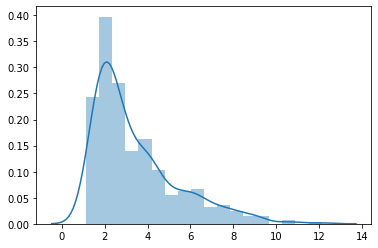

Graph for RAD: total = 9


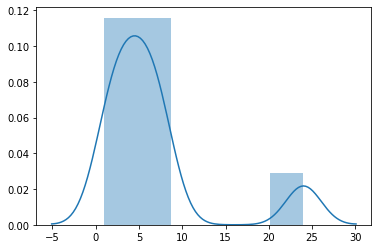

Graph for TAX: total = 66


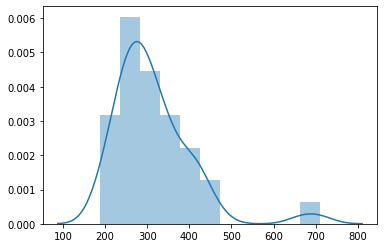

Graph for PTRATIO: total = 46


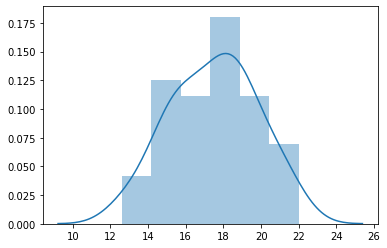

Graph for B: total = 357


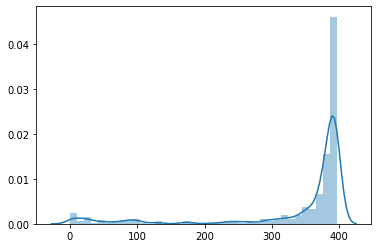

Graph for LSTAT: total = 455


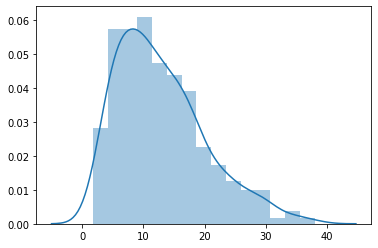

Graph for PRICE: total = 229


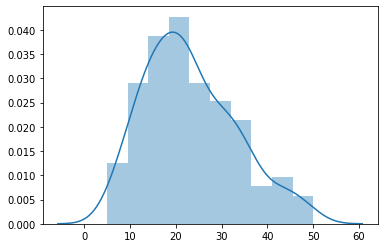

In [9]:
df_cat = bostondf[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.distplot(cat_num.index)
    #chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

by looking at the correlation values, anything < 5 can be used to see if there's linearity and of course their correlation for our jointplots/lmplots

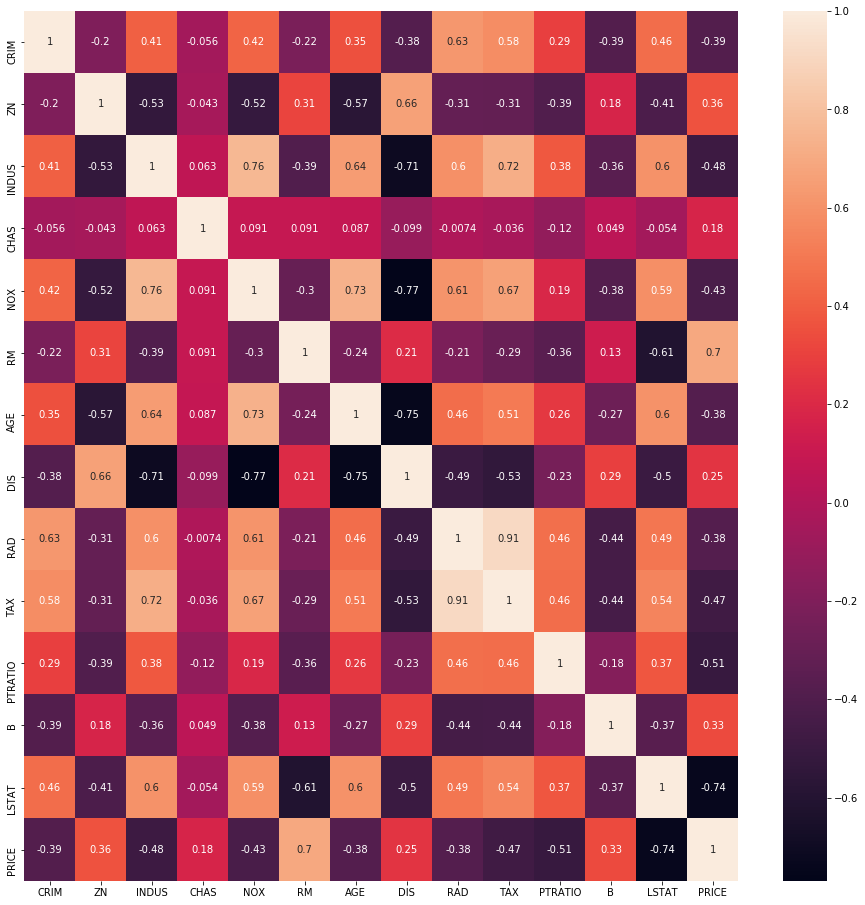

In [10]:
plt.figure(figsize = (16,16))
sns.heatmap(bostondf.corr(), annot=True)

from here, we'll only focus at the data in terms of prices and each specific attributes.

Majority of the houses have 5>x<7 rooms, and as the amount of rooms increase the higher the price.

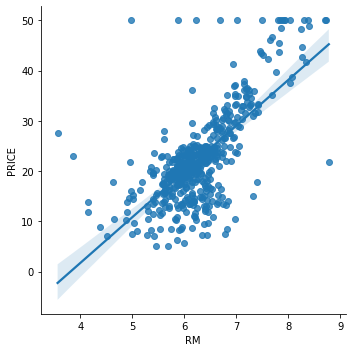

In [11]:
sns.lmplot(x='RM', y='PRICE', data=bostondf)

The more the PTRATIO(Pupil Student Ratio) the less the housing price, from here we can expect a drastic effect on the environment's educational system whereas children won't have the proper quality education in having a crowded classroom.

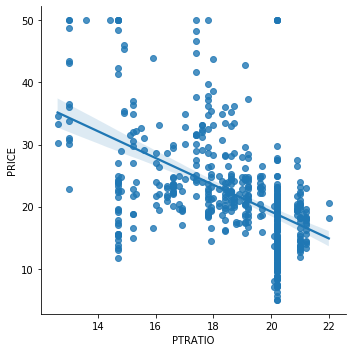

In [12]:
sns.lmplot(x='PTRATIO', y='PRICE', data=bostondf)

The price varies greatly towards a less populated area where INDUS(proportion of non-retail business acres per town) creates a busy and yet stressful environment for everyone; or the housing system was generally built away from the industrial work area.

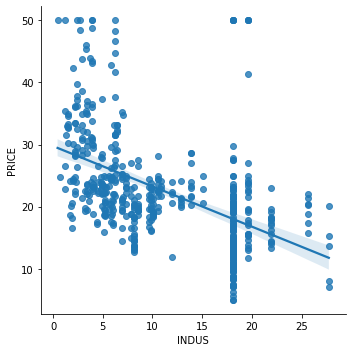

In [13]:
sns.lmplot(x='INDUS', y='PRICE', data=bostondf)

The lesser the NOx emission, the higher the price; with regards to health concerns and better state of living, health comes in a high price where as avoiding any health problems comes in terms with a pricey housing.

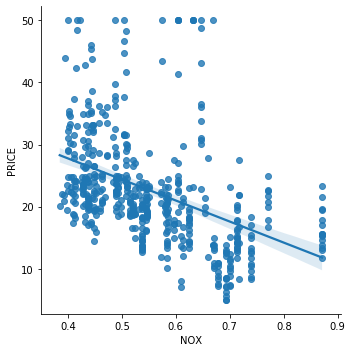

In [14]:
sns.lmplot(x='NOX', y='PRICE', data=bostondf)

the vast majority of people can are of higher state of living 

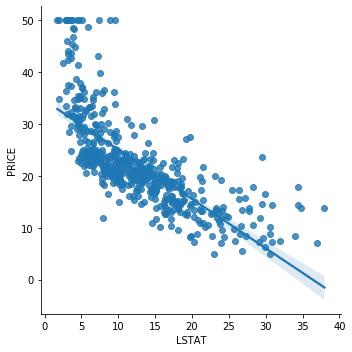

In [15]:
sns.lmplot(x='LSTAT', y='PRICE', data=bostondf)

### Applying Models

<b>Statsmodels </b>is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests.

The most important thing to keep in mind about the P-Value is that it is
a statistical metric: the lower is the P-Value, the more statistically significant is an independent variable,
that is the better predictor it will be.

From the P-Value, we can check its correlation if what you get is a loss or gain from the data at hand.

<b>Ordinary least squares (OLS)</b> regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [16]:
bostondf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [17]:
X = bostondf[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = bostondf['PRICE']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = np.squeeze(sc_y.fit_transform(y.values.reshape(-1, 1)))

In [22]:
import statsmodels.api as sm

In [23]:
# Ordinary Least Squares is used
# from here we select a p value that is less than 0.05
X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 12 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        17:58:51   Log-Likelihood:                -376.55
No. Observations:                 506   AIC:                             781.1
Df Residuals:                     492   BIC:                             840.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.638e-16      0.023  -2.46e-14      1.000      -0.045       0.045
x1            -0.1010      0.031     -3.287      0.001      -0.161      -0.041
x2             0.1177      0.035      3.382      0.001       0.049       0.186
x3             0.0153      0.046      0.334      0.738      -0.075       0.105
x4             0.0742      0.024      3.118      0.002       0.027       0.121
x5            -0.2238      0.048     -4.651      0.000      -0.318      -0.129
x6             0.2911      0.032      9.116      0.000       0.228       0.354
x7             0.0021      0.040      0.052      0.958      -0.077       0.082
x8            -0.3378      0.046     -7.398      0.000      -0.428      -0.248
x9             0.2897      0.063      4.613      0.000       0.166       0.413
x10           -0.2260      0.069     -3.280      0.001      -0.361      -0.091
x11           -0.2243      0.031     -7.283      0.000      -0.285      -0.164
x12            0.0924      0.027      3.467      0.001       0.040       0.145
x13           -0.4074      0.039    -10.347      0.000      -0.485      -0.330
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = model_reg = LinearRegression()
lm.fit(X_train, y_train)

# input a designated CV value
cvv = cross_val_score(lm, X_train, y_train,scoring='neg_mean_absolute_error',cv=5)
cvv.mean()

-3.1827027280038314

In [25]:
# Lasso Regression
from sklearn.linear_model import Lasso

lm_l = model_l = Lasso(alpha=0.007)
lm_l.fit(X_train,y_train)
# input a designated CV value

np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error',cv = 3))

-3.354704618331942

,alpha,error
3,0.004,-3.354066


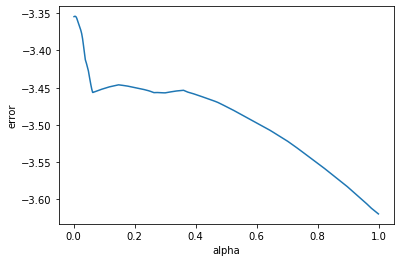

In [26]:
# for testing phase on getting the better alpha and error
alpha = []
error = []
for i in range(1,1000):
    alpha.append(i/1000)
    lml = Lasso(alpha=(i/1000))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error',cv = 3)))
# to show its graph
plt.plot(alpha, error)
plt.xlabel('alpha')
plt.ylabel('error')

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = model_rf = RandomForestRegressor()

# input a designated CV value
cvv = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error',cv = 5)
cvv.mean()

-2.190449945355192

In [28]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt', 'log2')}

# input a designated CV value
gs = GridSearchCV(rf, parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
cdf = pd.DataFrame(lm.coef_, ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'],columns=['Coefficient'])
cdf

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


 a 1 unit increase or decrease in each attribute is associated with an increase or decrease of price

In [30]:
# Testing Ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [31]:
from yellowbrick.regressor import prediction_error

C:\Users\Gilgamesh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


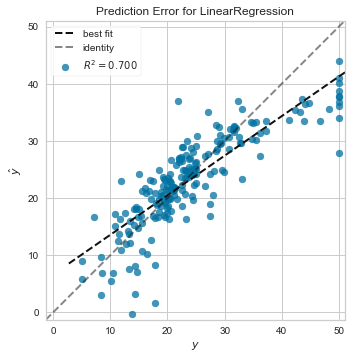

In [32]:
visualizer = prediction_error(model_reg, X_train, y_train, X_test, y_test)

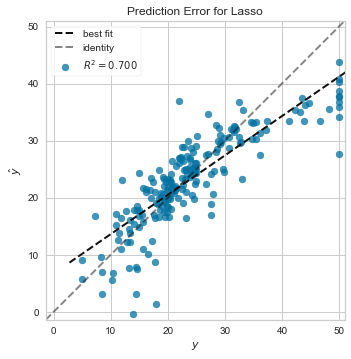

In [33]:
visualizer = prediction_error(model_l, X_train, y_train, X_test, y_test)

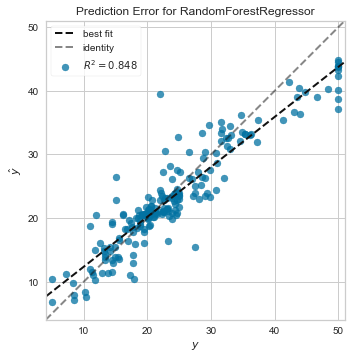

In [34]:
visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

Text(0.5, 1.0, 'Using Linear Regression')

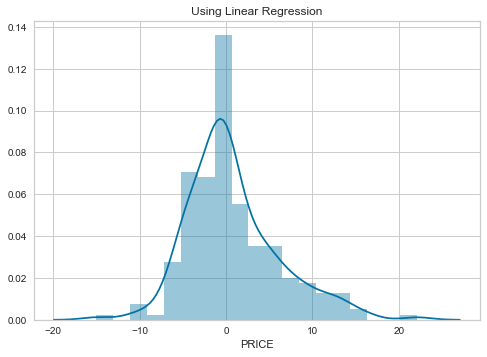

In [35]:
sns.distplot(y_test-tpred_lm)
plt.title('Using Linear Regression')

Text(0.5, 1.0, 'Using Lasso Regression')

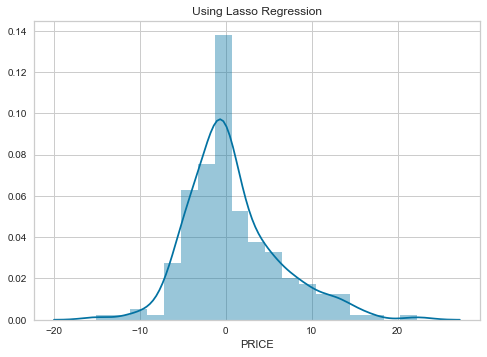

In [36]:
sns.distplot(y_test-tpred_lml)
plt.title('Using Lasso Regression')

Text(0.5, 1.0, 'Using Random Forest Regression')

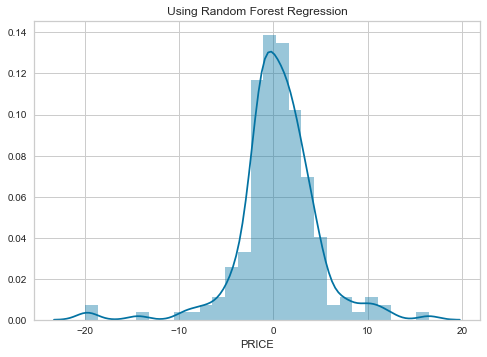

In [37]:
sns.distplot(y_test-tpred_rf)
plt.title('Using Random Forest Regression')

Text(0.5, 1.0, 'Using the Average Lasso and Random Forest')

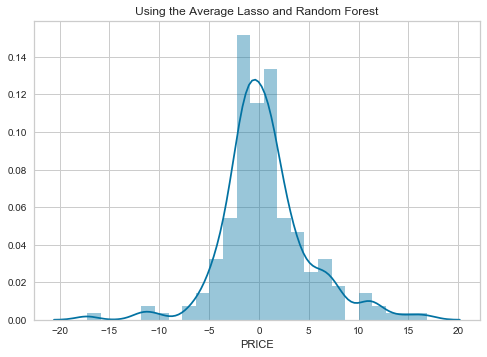

In [38]:
sns.distplot(y_test-(tpred_lml +tpred_rf)/2)
plt.title('Using the Average Lasso and Random Forest')

- **MAE** is the average error.



In [39]:
from sklearn.metrics import mean_absolute_error
print('MAE Linear Regression:',mean_absolute_error(y_test, tpred_lm))
print('MAE Lasso Regression', mean_absolute_error(y_test, tpred_lml))
print('MAE Random Forest Regression:', mean_absolute_error(y_test, tpred_rf))

print('MAE of the MEAN between Lasso Regression & Random Forest Regression:', mean_absolute_error(y_test,(tpred_lml +tpred_rf)/2))

MAE Linear Regression: 3.905144802627508
MAE Lasso Regression 3.8780289612864918
MAE Random Forest Regression: 2.829960591133004
MAE of the MEAN between Lasso Regression & Random Forest Regression: 3.048169972286625
